In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import os
print(os.getcwd())

C:\Users\kpred


In [3]:
data=pd.read_csv('train.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
X=data[['OverallQual']].values.flatten()
y=data['SalePrice'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
def linear_regression_from_scratch(X,y):
    X_mean=np.mean(X)
    y_mean=np.mean(y)
    m = (np.sum((X - X_mean) * (y - y_mean)))/(np.sum((X - X_mean) ** 2))
    b = y_mean - m * X_mean
    return m, b

In [9]:
m,b=linear_regression_from_scratch(X_train,y_train)

In [10]:
m

np.float64(44691.32566437004)

In [11]:
b

np.float64(-91946.92241884532)

In [12]:
def predict(X,m,b):
    return (m*X)+b

In [13]:
y_predict=predict(X_test,m,b)

In [14]:
mse=np.mean((y_test-y_predict)**2)

In [15]:
mse

np.float64(2420651458.8103347)

linear_model=LinearRegression()
linear_model.fit(X_train.reshape(-1,1),y_train)
y_predict_sklearn=linear_model.predict(X_test.reshape(-1,1))
mse_sklearn=np.mean((y_test-y_predict_sklearn)**2)

In [18]:
mse_sklearn

np.float64(2420651458.8103337)

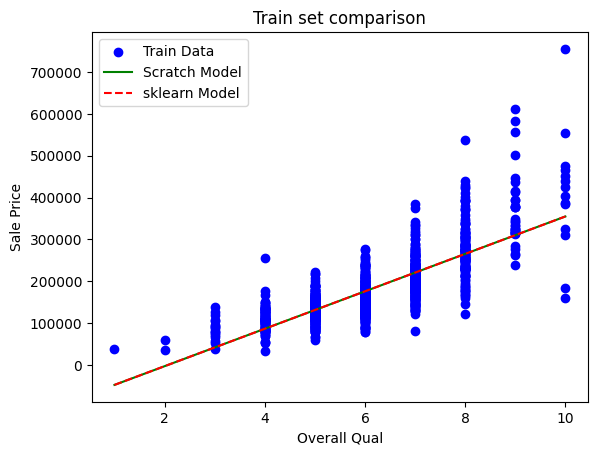

In [24]:
y_predict_train=np.array(predict(X_train,m,b))
y_predict_train_sklearn=linear_model.predict(X_train.reshape(-1,1))
plt.scatter(X_train,y_train,color='blue',label='Train Data')
sorted_idx = np.argsort(X_train)
plt.plot(X_train[sorted_idx],y_predict_train[sorted_idx],color='green',label='Scratch Model')
plt.plot(X_train[sorted_idx],y_predict_train_sklearn[sorted_idx],color='red',linestyle='--',label='sklearn Model')
plt.title('Train set comparison')
plt.xlabel('Overall Qual')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

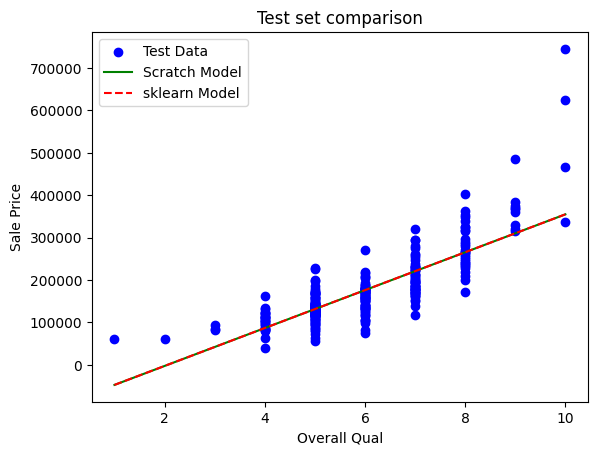

In [25]:
plt.scatter(X_test,y_test,color='blue',label='Test Data')
sorted_idx = np.argsort(X_test)
plt.plot(X_test[sorted_idx],y_predict[sorted_idx],color='green',label='Scratch Model')
plt.plot(X_test[sorted_idx],y_predict_sklearn[sorted_idx],color='red',linestyle='--',label='sklearn Model')
plt.title('Test set comparison')
plt.xlabel('Overall Qual')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

In [26]:
#Logistic Regression

In [28]:
data2=pd.read_csv('StudentsPerformance.csv')

In [29]:
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [30]:
data2['PassedMath'] = (data2['math score'] >= 50).astype(int)

In [31]:
data2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,PassedMath
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


In [32]:
X=data2[['reading score']].values
y=data2[['PassedMath']].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
def sigmoid_function(z):
    return 1/(1+np.exp(-z))

In [39]:
def train_logistic_regression(X,y,lr=0.01,iterations=1000):
    m=X.shape[0]
    X=np.hstack((np.ones((m, 1)),X))
    y=y.reshape(-1)
    theta=np.zeros(X.shape[1])
    for _ in range(iterations):
        z=np.dot(X,theta)
        h=sigmoid_function(z)
        gradient=np.dot(X.T, (h - y))/m
        theta-=lr*gradient
    return theta

In [40]:
theta=train_logistic_regression(X_train,y_train)

In [41]:
theta

array([-0.33036152,  0.18972491])

In [42]:
def predict(X,theta):
    m=X.shape[0]
    X=np.hstack((np.ones((m,1)),X))
    probs=sigmoid_function(np.dot(X,theta))
    return (probs>=0.5).astype(int)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_pred=predict(X_test, theta)

In [44]:
accuracy_score(y_test,y_pred)

0.85

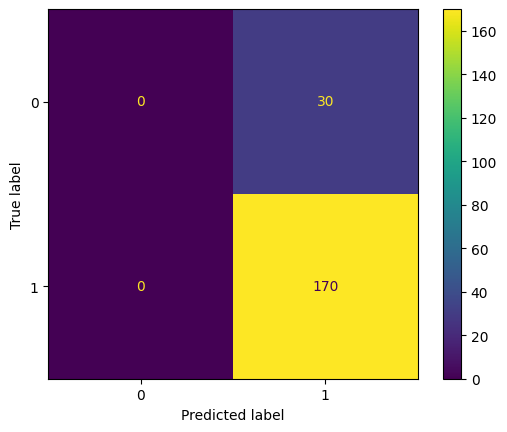

In [45]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train.reshape(-1))
y_pred_sk=logistic_model.predict(X_test)
sk_accuracy = accuracy_score(y_test, y_pred_sk)

In [50]:
sk_accuracy

0.88

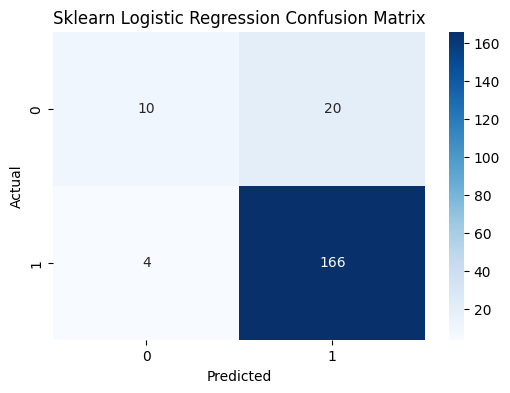

In [51]:
sk_cm = confusion_matrix(y_test, y_pred_sk)
plt.figure(figsize=(6,4))
sns.heatmap(sk_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Sklearn Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
custom_accuracy = accuracy_score(y_test,y_pred)
custom_precision = precision_score(y_test,y_pred)
custom_recall = recall_score(y_test,y_pred)
custom_f1 = f1_score(y_test,y_pred)
sk_precision = precision_score(y_test, y_pred_sk)
sk_recall = recall_score(y_test, y_pred_sk)
sk_f1 = f1_score(y_test, y_pred_sk)
results = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],'Custom Model': [custom_accuracy, custom_precision, custom_recall, custom_f1],'Sklearn Model': [sk_accuracy, sk_precision, sk_recall, sk_f1]})
print(results)

      Metric  Custom Model  Sklearn Model
0   Accuracy      0.850000       0.880000
1  Precision      0.850000       0.892473
2     Recall      1.000000       0.976471
3   F1-score      0.918919       0.932584
